# Conjunto de Datos

Proceda a descargar usando los datasets de scikit-learn el conjunto de datos llamado breast cancer.
Imprima las dimensiones del conjunto de datos, tanto a nivel de atributos como a nivel de clases.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
cancer = load_breast_cancer()
print ("El conjunto de datos tiene", cancer.data.shape[0], "filas y", cancer.data.shape[1], "atributos.", "Las dos clases son",cancer.target_names[0],"y",cancer.target_names[1])

El conjunto de datos tiene 569 filas y 30 atributos. Las dos clases son malignant y benign


# Algoritmos de clasificación

Seleccione 5 algoritmos de clasificación, procure evitar el uso de los algoritmos básicos, de hecho puede
recurrir al uso de algoritmos que no se hayan visto en clase. Para cada algoritmo construya el clasificador
usando los parámetros "estimados" o "por defecto".

# Validación tradicional

Separe el conjunto de entrenamiento, del conjunto de pruebas (30% para pruebas) y determine la eficiencia
de cada método, con los valores "estimados" o "por defecto" del método

Se separa el conjunto de entrenamiento del conjunto de prueba en una razón 70:30

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

## Clasificador Support Vector

In [4]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
print("Training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.637


## Clasificador AdaBoost

In [5]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(adaboost.score(X_train, y_train)))
print("Test set score: {:.3f}".format(adaboost.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.953


## Clasificador naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB
GaussianNB = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(GaussianNB.score(X_train, y_train)))
print("Test set score: {:.3f}".format(GaussianNB.score(X_test, y_test)))

Training set score: 0.952
Test set score: 0.930


## Clasificador Gradient Tree Boosting

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(gradboost.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gradboost.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.953


## MLPClassifier

In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test, y_test)))

Training set score: 0.759
Test set score: 0.731


# Afinamiento de parámetros del clasificador

Para cada método determine los mejores parámetros de manera tal que evite overfitting y underfitting.
RECOMENDACIÓN: Construya una curva (cuando sea posible) de accuracy vrs. x parametro, donde
x parametro corresponde al(os) parámetro(s) según el método elegido.

Se importa matplotlib

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

## Clasificador Support Vector

In [10]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test, y_test)))

Training set score: 0.970
Test set score: 0.918


Al modificar el kernel a linear los scores mejoran.

## Clasificador AdaBoost

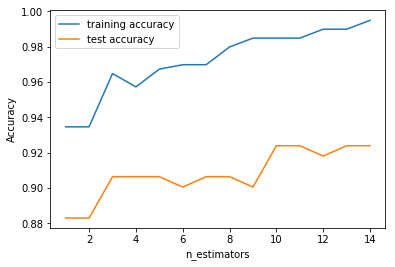

In [11]:
from sklearn.ensemble import AdaBoostClassifier

training_acc = []
test_acc = []

rango = range(1, 15)
for n in rango:
    # se construye el modelo de clasificacion
    adaboost = AdaBoostClassifier(n_estimators=n).fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(adaboost.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(adaboost.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

El valor óptimo de n_estimators para AdaBoost es alrededor de 2.

## Clasificador niave Bayes

El clasificador naive Bayes presenta scores altos sin overfitting.

## Clasificador Gradient Tree Boosting

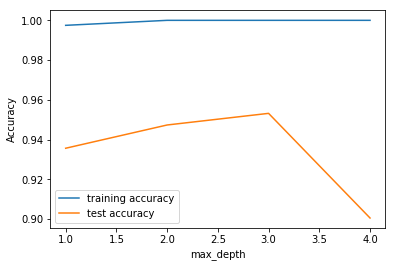

In [12]:
training_acc = []
test_acc = []

rango = range(1, 5)
for c in rango:
    # se construye el modelo de clasificacion
    gradboost = GradientBoostingClassifier(max_depth=c).fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(gradboost.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(gradboost.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Con un valor de max_depth=1 en GradientBoostingClassifier se evita el overfitting.

## MLPClassifier

In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs').fit(X_train, y_train)
print("Training set score: {:.3f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test, y_test)))

Training set score: 0.947
Test set score: 0.936


Al cambiar el solver de MLPClassifier a lbfgs los scores aumentan

# Validación cruzada

Utilice dos de los métodos de Cross-Validation y aplíquelos a cada método de clasificación.

## Cross Validation (k-fold)

In [14]:
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='linear')
adaboost = AdaBoostClassifier(n_estimators=2)
gradboost = GradientBoostingClassifier(max_depth=1)
mlp = MLPClassifier(solver='lbfgs')

algoritmos=[svc,adaboost,GaussianNB,gradboost,mlp]

for i in algoritmos:
    scores = cross_val_score(i, cancer.data, cancer.target)
    print("Cross-validation scores de",i,": {}".format(scores))

Cross-validation scores de SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) : [ 0.93684211  0.96842105  0.94708995]
Cross-validation scores de AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=2, random_state=None) : [ 0.91578947  0.88947368  0.89417989]
Cross-validation scores de GaussianNB(priors=None) : [ 0.91578947  0.94736842  0.94708995]
Cross-validation scores de GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', r

## Shuffle-Split CV


In [15]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.3, train_size=.7, n_splits=10)

svc = SVC(kernel='linear')
adaboost = AdaBoostClassifier(n_estimators=2)
gradboost = GradientBoostingClassifier(max_depth=1)
mlp = MLPClassifier(solver='lbfgs')

algoritmos=[svc,adaboost,GaussianNB,gradboost,mlp]

for i in algoritmos:
    scores = cross_val_score(i, cancer.data, cancer.target, cv=shuffle_split)
    print("Cross-validation scores de",i,": {}".format(scores))


Cross-validation scores de SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) : [ 0.97076023  0.94152047  0.94736842  0.94736842  0.92982456  0.94736842
  0.97076023  0.97076023  0.95906433  0.95906433]
Cross-validation scores de AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=2, random_state=None) : [ 0.93567251  0.92982456  0.94152047  0.83625731  0.91812865  0.88888889
  0.87134503  0.94152047  0.9005848   0.9122807 ]
Cross-validation scores de GaussianNB(priors=None) : [ 0.95321637  0.94736842  0.94152047  0.94736842  0.94152047  0.92982456
  0.94152047  0.94152047  0.92397661  0.95321637]
Cross-validation scores de GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
             

## Conclusiones

Los clasificadores SVC, AdaBoost y Gradient Tree Boosting tienden a overfit usando los parámetros por defecto, mientras que naive Bayes presenta buenos resultados por defecto. El solver lbfgs del clasificador MLP mejoró en gran medida los scores. En general la validación cruzada da buenos resultados para todos los algoritmos, sin embargo en ambas validaciones se obtuvo un valor bajo para el clasificador MLP lo que hace sospechar un patrón en los datos.